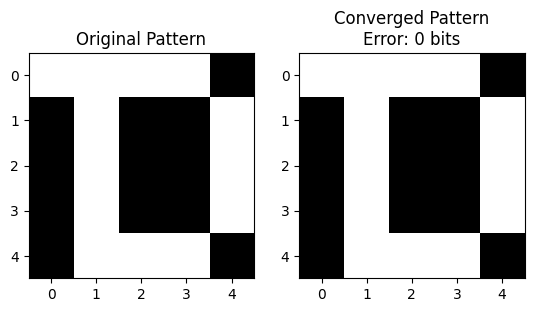

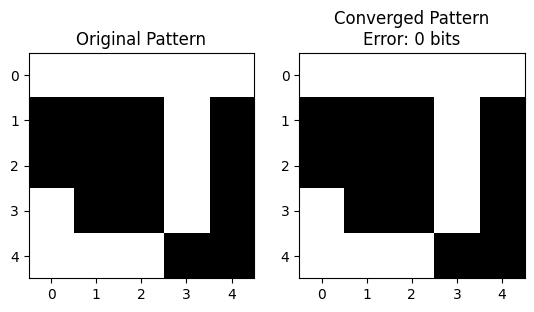

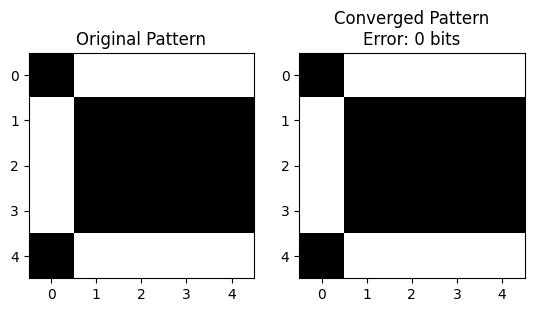

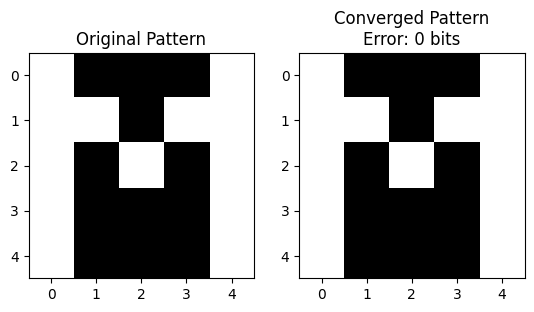

Error tolerable for each stored pattern (in bits): [0, 0, 0, 0]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Patterns to store
# D, J, C, M
X = np.array([[1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1],
              [1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
              [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1],
              [1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1]]).T

# Learn the weights according to Hebb's rule
m, n = X.shape
W = np.zeros((m, m))
for i in range(n):
    W += np.outer(X[:, i], X[:, i])
np.fill_diagonal(W, 0)
W /= n

# Calculate the error tolerable for each stored pattern
errors = []
for i in range(n):
    x = X[:, i].copy()
    x[4] *= -1  # Introduce error in the pattern
    y = x.copy()
    erry = 10  # Initialize error to a high value
    while erry > 1:
        yp = np.sign(W @ y)
        erry = np.linalg.norm(yp - y)
        y = yp
    # Calculate Hamming distance between original and converged pattern
    error_bits = np.sum(X[:, i] != np.sign(y))
    errors.append(error_bits)

    # Plotting original and converged patterns
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(X[:, i].reshape(5, 5), cmap='gray')
    axs[0].set_title('Original Pattern')
    axs[1].imshow(y.reshape(5, 5), cmap='gray')
    axs[1].set_title('Converged Pattern\nError: {} bits'.format(error_bits))
    plt.show()

print("Error tolerable for each stored pattern (in bits):", errors)


Optimal Configuration:
[3 0 4 6 2 7 5 1]


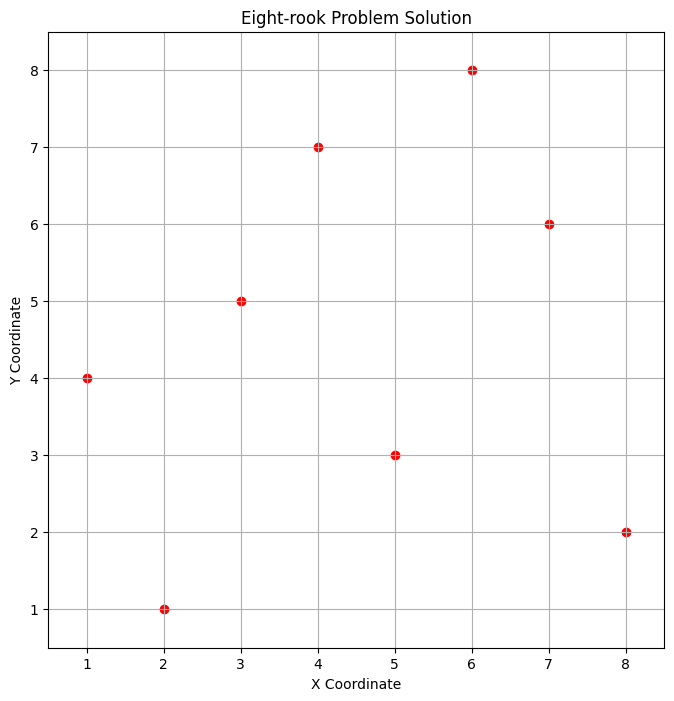

In [1]:
import numpy as np
import matplotlib.pyplot as plt

board_size = 8

# Define the energy function for the Eight-rook problem
def energy_function(board_config):
    # Initialize energy to zero
    energy = 0
    
    # Check for attacking rooks in rows and columns
    for i in range(board_size):
        for j in range(i+1, board_size):
            # If two rooks are in the same row, column, they attack each other
            if board_config[i] == board_config[j]:
                energy += 1  # Increase energy if rooks attack each other
    
    return energy

# Solve the Eight-rook problem using the Hopfield network
def hopfield_eight_rook(max_iterations=1000):
    # Initialize the Hopfield network weights
    weights = np.zeros((board_size, board_size))
    
    # Initialize the board configuration randomly
    board_config = np.random.permutation(board_size)
    
    # Set up the weights such that configurations with attacking rooks have higher energy
    for i in range(board_size):
        for j in range(i+1, board_size):
            if board_config[i] == board_config[j]:
                weights[i, j] = weights[j, i] = 1   # Penalize configurations where rooks attack each other
    
    
    # Track previous energy to check for convergence
    prev_energy = float('inf')
    
    # Iterate to update board configuration
    for _ in range(max_iterations):
        for i in range(board_size):
            energy_diff = 2 * np.dot(weights[i], board_config)
            if energy_diff < 0 or np.random.rand() < np.exp(-energy_diff):
                board_config[i] *= -1  # Flip the rook position
        
        energy = energy_function(board_config)
        if energy <= prev_energy:
            break
        prev_energy = energy
    
    return board_config

# Solve the Eight-rook problem
optimal_config = hopfield_eight_rook()
print("Optimal Configuration:")
print(optimal_config)

# Plot the optimal configuration on the X, Y plane
def plot_configuration(config):
    plt.figure(figsize=(8, 8))
    plt.scatter(range(1, board_size + 1), config + 1, marker='o', color='red')  # Add 1 to config for 1-based indexing
    plt.title("Eight-rook Problem Solution")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.xlim(0.5, board_size + 0.5)  # Adjust xlim to center points
    plt.ylim(0.5, board_size + 0.5)  # Adjust ylim to center points
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure equal aspect ratio
    plt.show()

# Plot the optimal configuration
plot_configuration(optimal_config)

Optimal Path Indices: [2, 4, 3, 6, 7, 0, 8, 9, 5, 1]


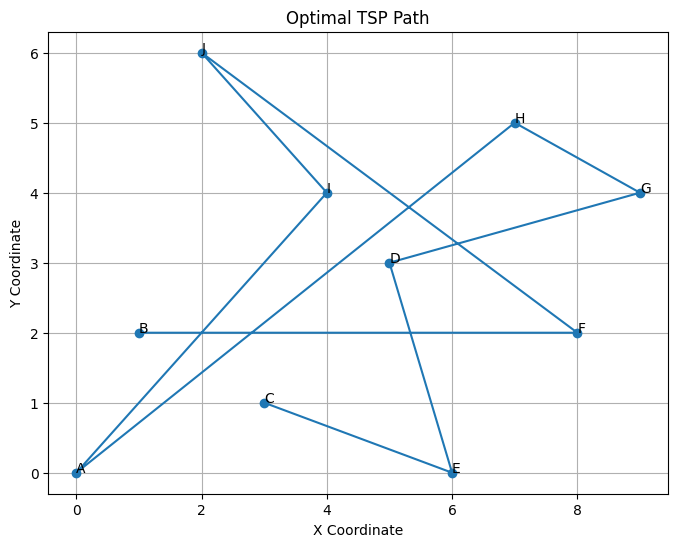

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cities and their coordinates
cities = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (3, 1),
    'D': (5, 3),
    'E': (6, 0),
    'F': (8, 2),
    'G': (9, 4),
    'H': (7, 5),
    'I': (4, 4),
    'J': (2, 6)
}

# Calculate distances between cities
def distance(city1, city2):
    x1, y1 = cities[city1]
    x2, y2 = cities[city2]
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calculate distance matrix
N = len(cities)
dist_matrix = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i != j:
            dist_matrix[i][j] = distance(chr(65 + i), chr(65 + j))

# Define the energy function for the TSP
def energy_function(path, dist_matrix):
    energy = 0
    for i in range(len(path) - 1):
        energy += dist_matrix[path[i]][path[i + 1]]
    energy += dist_matrix[path[-1]][path[0]]  # Return to the starting city
    return energy

# Initialize the Hopfield network weights
weights = -dist_matrix

# Solve the TSP using a Hopfield network
def hopfield_tsp(dist_matrix, weights, max_iterations=1000):
    N = len(dist_matrix)
    path = list(range(N))  # Initial path
    np.random.shuffle(path)  # Shuffle the initial path
    prev_energy = float('inf')
    for _ in range(max_iterations):
        for i in range(N):
            energy_diff = 2 * np.dot(weights[i], path)
            if energy_diff < 0 or np.random.rand() < np.exp(-energy_diff):
                path[i] *= -1  # Flip the city in the path

        energy = energy_function(path, dist_matrix)
        if energy >= prev_energy:
            break
        prev_energy = energy

    return path

# Solve the TSP
optimal_path = hopfield_tsp(dist_matrix, weights)
print("Optimal Path Indices:", optimal_path)

# Plot the optimal path
optimal_cities = [chr(65 + idx) for idx in optimal_path]
optimal_coordinates = [cities[city] for city in optimal_cities]

plt.figure(figsize=(8, 6))
plt.plot([coord[0] for coord in optimal_coordinates], [coord[1] for coord in optimal_coordinates], marker='o')
for i, city in enumerate(optimal_cities):
    plt.text(cities[city][0], cities[city][1], city)
plt.title("Optimal TSP Path")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()
